

Extraemos los datos



In [ ]:
pip install pandas

In [ ]:
pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # subir el archivo kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andrsbentezconcha","key":"1803aefc5414583d80ac97197ddb8271"}'}

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"  # Ruta donde colocaste el archivo kaggle.json

In [ ]:
import shutil
from kaggle.api.kaggle_api_extended import KaggleApi

# Crear una instancia de la API de Kaggle y autenticar
api = KaggleApi()

# Descargar el conjunto de datos Wine Reviews de Kaggle
dataset_name = "zynicide/wine-reviews"  # Nombre correcto del dataset
download_path = "/content/wine-reviews.zip"  # Ruta de descarga del archivo ZIP

# Descargar el conjunto de datos
api.dataset_download_files(dataset_name, path=download_path, unzip=True)

# Mover los archivos a la carpeta '/content/wine-reviews'
destination_path = "/content/wine-reviews"
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

# Mover los archivos descargados a la carpeta de destino
shutil.move(download_path, destination_path)

print(f"Archivos movidos a: {destination_path}")


Dataset URL: https://www.kaggle.com/datasets/zynicide/wine-reviews
Archivos movidos a: /content/wine-reviews


In [ ]:
# Ruta al archivo CSV que se descomprimió
csv_file_path = '/content/wine-reviews/winemag-data-130k-v2.csv'

se cargan los dos df

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv("/content/wine-reviews/wine-reviews.zip/winemag-data_first150k.csv")
df2 = pd.read_csv("/content/wine-reviews/wine-reviews.zip/winemag-data-130k-v2.csv")

# 1.- LIMPIEZA DE DATOS O PREPROCESAMIENTO

Limpieza de datos: eliminación de stopwords, stemming,
lematización.


In [ ]:
pip install spacy

In [ ]:
import nltk # Natural Language Toolkit
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize # Tokenización de las reseñas
nltk.download('punkt')          # modelo de tokenización
nltk.download('punkt_tab')      # Es un recurso adicional que se menciona en algunos contextos, pero no es esencial en todos los casos.
import re # se usa para trabajar con expresiones regulares, lo que permite buscar, extraer, dividir, reemplazar y validar patrones en cadenas de texto.
import string
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
pip install nltk

In [ ]:
df2['description']

,description
0,"Aromas include tropical fruit, broom, brimston..."
1,"This is ripe and fruity, a wine that is smooth..."
2,"Tart and snappy, the flavors of lime flesh and..."
3,"Pineapple rind, lemon pith and orange blossom ..."
4,"Much like the regular bottling from 2012, this..."
...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...
129967,Citation is given as much as a decade of bottl...
129968,Well-drained gravel soil gives this wine its c...
129969,"A dry style of Pinot Gris, this is crisp with ..."


# 1.1 - CONVERTIR A MINISCULAS

pasar las mayusculas a minusculas para facilitar el análisis

In [ ]:
# Preprocesamiento del texto
def preprocesamiento_texto(text):

    # Convertir a minúsculas
    text = text.lower()

    # Eliminar números, puntuación y caracteres especiales
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # busca todo lo que no sea una letra del alfabeto o un espacio en blanco

    # Eliminar espacios adicionales
    text = text.strip()   # elimina cualquier espacio en blanco extra al principio o al final del texto

    return text

# Aplicar el preprocesamiento a la columna 'description'
df2['clean_description'] = df2['description'].apply(preprocesamiento_texto)


In [ ]:
df2['clean_description']

,clean_description
0,aromas include tropical fruit broom brimstone ...
1,this is ripe and fruity a wine that is smooth ...
2,tart and snappy the flavors of lime flesh and ...
3,pineapple rind lemon pith and orange blossom s...
4,much like the regular bottling from this come...
...,...
129966,notes of honeysuckle and cantaloupe sweeten th...
129967,citation is given as much as a decade of bottl...
129968,welldrained gravel soil gives this wine its cr...
129969,a dry style of pinot gris this is crisp with s...


# 1.2- Tokenización

unidades mínimas de significado o tokens

In [ ]:
df2['tokens'] = df2['clean_description'].apply(lambda x: word_tokenize(x, language='english'))

In [ ]:
df2['tokens']

,tokens
0,"[aromas, include, tropical, fruit, broom, brim..."
1,"[this, is, ripe, and, fruity, a, wine, that, i..."
2,"[tart, and, snappy, the, flavors, of, lime, fl..."
3,"[pineapple, rind, lemon, pith, and, orange, bl..."
4,"[much, like, the, regular, bottling, from, thi..."
...,...
129966,"[notes, of, honeysuckle, and, cantaloupe, swee..."
129967,"[citation, is, given, as, much, as, a, decade,..."
129968,"[welldrained, gravel, soil, gives, this, wine,..."
129969,"[a, dry, style, of, pinot, gris, this, is, cri..."


# 1.3- Eliminación de stop words

In [ ]:
# Obtener las stop words en inglés
stop_words = set(stopwords.words('english'))

# Eliminar stop words de las reseñas tokenizadas
df2['tokens_no_stopwords'] = df2['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words]) # filtra las palabras de las reseñas tokenizadas

In [ ]:
df2['tokens_no_stopwords']

,tokens_no_stopwords
0,"[aromas, include, tropical, fruit, broom, brim..."
1,"[ripe, fruity, wine, smooth, still, structured..."
2,"[tart, snappy, flavors, lime, flesh, rind, dom..."
3,"[pineapple, rind, lemon, pith, orange, blossom..."
4,"[much, like, regular, bottling, comes, across,..."
...,...
129966,"[notes, honeysuckle, cantaloupe, sweeten, deli..."
129967,"[citation, given, much, decade, bottle, age, p..."
129968,"[welldrained, gravel, soil, gives, wine, crisp..."
129969,"[dry, style, pinot, gris, crisp, acidity, also..."


In [ ]:
# Obtener el conjunto de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Listar todas las stopwords
print(stop_words)


{'out', 'what', 'that', 'too', 'are', 'whom', 'about', "mightn't", 'mightn', "they'd", "needn't", "they're", 'wouldn', 'does', 'ours', 'shan', 'aren', "she'd", 'o', 'between', 'below', 'ourselves', 'yours', 'mustn', 'as', "he'll", 'an', "i've", "shouldn't", "didn't", 'don', 'this', 'if', 'own', "isn't", 'each', 'him', "it's", 'then', 'couldn', "it'll", "mustn't", 'shouldn', "won't", 'yourself', 'yourselves', 've', 'her', 'to', 'when', 'such', 'doing', 'which', 'isn', 'themselves', "i'm", 'needn', "you've", 'in', 'again', "wasn't", 'will', 'doesn', 'herself', "shan't", 'i', 'but', 'and', 'same', 'weren', 'it', "he's", 'only', 'you', 'my', "it'd", 't', 'most', 'can', "hasn't", 'been', 'of', 'off', 'hadn', 'should', 'she', 'a', 'during', "we'll", "should've", "i'll", 'because', 'your', 'down', 'ma', 'very', 'how', 'were', 'has', 'ain', 'them', 'hasn', "weren't", 'while', 'all', "doesn't", "aren't", "we're", 'who', 'with', 'at', 'haven', 'under', 's', 'until', 'myself', 'nor', 'our', 'once

# 1.4- Lematización

normalización de palabras en el que se reduce una palabra a su lema o raíz

In [ ]:
lemmatizer = WordNetLemmatizer()   # clase proporcionada por NLTK que se basa en WordNet, una gran base de datos léxica del idioma inglés.

# Lematizar las palabras
df2['lemmatized'] = df2['tokens_no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

Cada fila contiene una lista de palabras representadas como un list en lugar de una cadena de texto.

In [ ]:
df2['lemmatized']

,lemmatized
0,"[aroma, include, tropical, fruit, broom, brims..."
1,"[ripe, fruity, wine, smooth, still, structured..."
2,"[tart, snappy, flavor, lime, flesh, rind, domi..."
3,"[pineapple, rind, lemon, pith, orange, blossom..."
4,"[much, like, regular, bottling, come, across, ..."
...,...
129966,"[note, honeysuckle, cantaloupe, sweeten, delic..."
129967,"[citation, given, much, decade, bottle, age, p..."
129968,"[welldrained, gravel, soil, give, wine, crisp,..."
129969,"[dry, style, pinot, gris, crisp, acidity, also..."


El stemming y la lematización son dos técnicas de procesamiento de texto utilizadas para reducir las palabras a su raíz o forma base

# 1.5- Vectorización del texto

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
pip install scikit-learn

In [ ]:
# Unir las palabras lematizadas en una sola cadena de texto
df2['description_text'] = df2['lemmatized'].apply(lambda x: ' '.join(x)) # texto en formato de cadenas (strings) en lugar de listas de tokens

# Vectorizar las reseñas usando TF-IDF
vectorizer = TfidfVectorizer(max_features=13000)  # Puedes ajustar el número de características
X = vectorizer.fit_transform(df2['description_text'])

donde cada fila representa una reseña y cada columna una palabra en el vocabulario. El parámetro max_features=13000 limita el número de características (palabras) que se usarán, manteniendo solo las 13,000 palabras más frecuentes o importantes en el corpus.

La idea de TF-IDF es medir no sólo cuánto aparece una palabra en un documento, sino también qué tan frecuente es esa palabra en todo el corpus.

In [ ]:
X.shape

(129971, 13000)

In [ ]:
print (X)

  (0, 514)	0.09473100175152185
  (0, 5691)	0.2740009210132522
  (0, 11897)	0.20097306686749958
  (0, 4635)	0.08399009090579283
  (0, 1402)	0.3281829757773461
  (0, 1356)	0.3746599684465707
  (0, 3431)	0.33916108869225375
  (0, 5395)	0.15371016182218342
  (0, 8113)	0.09811044744815921
  (0, 5903)	0.27662263054158115
  (0, 8021)	0.28433046495449077
  (0, 4012)	0.277320978760643
  (0, 7821)	0.2144380515934406
  (0, 438)	0.14349302137525852
  (0, 2085)	0.15209148356006763
  (0, 9766)	0.232582849923254
  (0, 273)	0.18291768042063794
  (0, 1366)	0.22397630031748153
  (0, 77)	0.1022376761798937
  (1, 4635)	0.09501877258479981
  (1, 77)	0.11566243586320148
  (1, 9541)	0.1302273900626043
  (1, 4667)	0.17990760913593523
  (1, 12787)	0.08299445545375332
  (1, 10507)	0.193901663936669
  :	:
  (129969, 2631)	0.23848858698847514
  (129969, 5158)	0.3306909937188862
  (129969, 10569)	0.2384459643168847
  (129969, 8708)	0.25261822788005495
  (129969, 7557)	0.24088806894561396
  (129969, 284)	0.21178050

ver las palabras que corresponden a las columnas de la matriz TF-IDF

In [ ]:
vocab = vectorizer.get_feature_names_out()
print(vocab[23])  # Ver la palabra que corresponde a la columna xxxx

absolutely


# 2.- Análisis de frecuencia de palabras más comunes en vinos bien puntuados vs. mal puntuados.


In [ ]:
min_points = df2['points'].min()
max_points = df2['points'].max()

print(f'Mínimo: {min_points}, Máximo: {max_points}')

Mínimo: 80, Máximo: 100


In [ ]:
# Definir el umbral para los vinos bien puntuados y mal puntuados
umbral_puntuacion = 90

# Filtrar los vinos bien puntuados (puntuación > 90) y mal puntuados (puntuación <= 90)
vinos_bien_puntuados = df2[df2['points'] > umbral_puntuacion]
vinos_mal_puntuados = df2[df2['points'] <= umbral_puntuacion]

(Bag of words)

In [ ]:
# Vectorizador para obtener las palabras más frecuentes
vectorizer = CountVectorizer(stop_words='english', max_features=50)  # Puedes ajustar el número de características

# Vectorizar las reseñas de vinos bien puntuados y mal puntuados
X_bien = vectorizer.fit_transform(vinos_bien_puntuados['description_text'])
X_mal = vectorizer.transform(vinos_mal_puntuados['description_text'])

# Obtener las palabras del vocabulario (las 50 más frecuentes)
vocab = vectorizer.get_feature_names_out()

# Obtener las frecuencias de palabras para cada grupo (bien puntuados y mal puntuados)
freq_bien = X_bien.sum(axis=0).A1  # Sumar las frecuencias de las palabras en vinos bien puntuados
freq_mal = X_mal.sum(axis=0).A1  # Sumar las frecuencias de las palabras en vinos mal puntuados


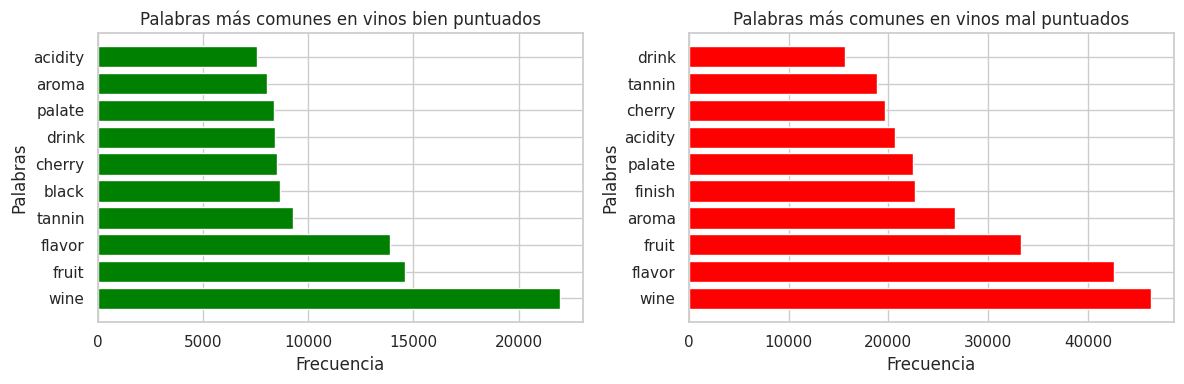

In [ ]:
# Ordenar las palabras por su frecuencia para cada grupo
orden_bien = np.argsort(freq_bien)[::-1]  # Ordenar en orden descendente para vinos bien puntuados
orden_mal = np.argsort(freq_mal)[::-1]  # Ordenar en orden descendente para vinos mal puntuados

# Tomar las 10 palabras más frecuentes de cada grupo
top_10_bien = vocab[orden_bien][:10]
top_10_mal = vocab[orden_mal][:10]

# Tomar las frecuencias de esas palabras
top_10_bien_freq = freq_bien[orden_bien][:10]
top_10_mal_freq = freq_mal[orden_mal][:10]

# Graficar las palabras más frecuentes en ambos grupos
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Vinos bien puntuados
ax[0].barh(top_10_bien, top_10_bien_freq, color='green')
ax[0].set_title("Palabras más comunes en vinos bien puntuados")
ax[0].set_xlabel("Frecuencia")
ax[0].set_ylabel("Palabras")

# Vinos mal puntuados
ax[1].barh(top_10_mal, top_10_mal_freq, color='red')
ax[1].set_title("Palabras más comunes en vinos mal puntuados")
ax[1].set_xlabel("Frecuencia")
ax[1].set_ylabel("Palabras")

plt.tight_layout()
plt.show()

En ambos parece ser lo que más observan los catadores es vino, frutal, y sabor, que es lo mas mencionado en la descipción. Sobre las diferencias, en mal rankeados le sigue aroma, final y paladar. En bien puntuados, tanino, negro y cherry (cereza o fresa).

En buenos puntuados, es menos frecuente la palabra acidez mientras que se hace más frecuente en mal calificados.

# 3.- Construcción de un modelo de análisis de sentimiento para clasificar reseñas como positivas o negativas.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# 3.1.- REGRESION LOGÍSTICA

3.1.1- PREPROCESAMIENTO

In [ ]:
# Etiquetar las reseñas como positivas o negativas basándonos en la puntuación
umbral_puntuacion = 90
df2['sentiment'] = df2['points'].apply(lambda x: 1 if x > umbral_puntuacion else 0)

# Mostrar la distribución de las clases
print(df2['sentiment'].value_counts())


sentiment
0    96336
1    33635
Name: count, dtype: int64


1: Reseña positiva (puntuación > 90).

0: Reseña negativa (puntuación <= 90).

3.1.2 - Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X = df2['description_text']  # Las reseñas lematizadas
y = df2['sentiment']  # Las etiquetas de sentimiento

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3.1.3.- Vectorización del texto con TF-IDF: convertir las reseñas de texto en vectores numéricos usando TF-IDF.

In [ ]:
# Crear un vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)

# Ajustar y transformar el conjunto de entrenamiento
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transformar el conjunto de prueba
X_test_tfidf = vectorizer.transform(X_test)

3.1.4- Construcción y entrenamiento del modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test_tfidf)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     19223
           1       0.76      0.61      0.67      6772

    accuracy                           0.85     25995
   macro avg       0.81      0.77      0.79     25995
weighted avg       0.84      0.85      0.84     25995

[[17894  1329]
 [ 2659  4113]]


**Precisión**: Cuántas de las predicciones positivas fueron realmente positivas.

Para 0: el 87% de las veces que el modelo predijo una reseña como negativa, efectivamente era negativa.

Para 1: El 76% de las veces que el modelo predijo una reseña como positiva, efectivamente era positiva.



**Recall**: Cuántas de las verdaderas etiquetas positivas fueron correctamente identificadas.

Para 0: El modelo identificó correctamente el 93% de todas las reseñas negativas

Para 1: El modelo identificó correctamente solo el 60% de todas las reseñas positivas.

F1-score: Promedio ponderado de la precisión y recall.

La exactitud global del modelo es 0.84, lo que indica que el 84% de las predicciones fueron correctas.

Evaluación del modelo

# 3.2.- KNN Vecinos cercanos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Crear y entrenar el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_tfidf, y_train)

# Realizar predicciones
y_pred_knn = knn_model.predict(X_test_tfidf)

# Evaluar el rendimiento
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.80      0.95      0.87     19223
           1       0.71      0.34      0.46      6772

    accuracy                           0.79     25995
   macro avg       0.76      0.65      0.67     25995
weighted avg       0.78      0.79      0.76     25995

[[18279   944]
 [ 4466  2306]]


objetivo es analizar qué tan bien predice si una reseña es positiva o negativa según los puntos dados. Este modelo clasifica las reseñas según las características más cercanas (los puntos más similares) de otras reseñas.

1 = vino bien puntuado (reseña positiva).
0 = vino mal puntuado (reseña negativa).

* con los resultados de precision y recall , sigue siendo mejor la regresión logistica

# 3.3 - Redes Neuronales (MLP - Multi-layer Perceptron)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Crear y entrenar el modelo de red neuronal
mlp_model = MLPClassifier(random_state=42, max_iter=500)
mlp_model.fit(X_train_tfidf, y_train)

# Realizar predicciones
y_pred_mlp = mlp_model.predict(X_test_tfidf)

# Evaluar el rendimiento
print(classification_report(y_test, y_pred_mlp))
print(confusion_matrix(y_test, y_pred_mlp))


              precision    recall  f1-score   support

           0       0.90      0.90      0.90     19223
           1       0.72      0.72      0.72      6772

    accuracy                           0.85     25995
   macro avg       0.81      0.81      0.81     25995
weighted avg       0.85      0.85      0.85     25995

[[17341  1882]
 [ 1897  4875]]


precisión

para 0: el 72% de esas predicciones fueron correctas.

para 1: el 90% de esas predicciones fueron correctas.



recall

para 0: el 90% de todas las verdaderas reseñas negativas (mal puntuadas) fueron correctamente identificadas por el modelo como clase 0.

para 1: el 72% de todas las verdaderas reseñas positivas (bien puntuadas) fueron correctamente identificadas por el modelo como clase 1

# 4.- Visualización de resultados con nubes de palabras.

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

En lugar de basarse en la clasificación de las reseñas según la puntuación, podrías basar la nube de palabras en las características más importantes según el modelo de regresión logística.

El modelo de regresión logística tiene coeficientes que indican la importancia de cada palabra para predecir la clase (positiva o negativa).

Las palabras con coeficientes positivos son las que el modelo asocia más con las reseñas positivas, y las palabras con coeficientes negativos son las que asocia más con las reseñas negativas.

Para eso vamos a:

Obtener los coeficientes del modelo de regresión logística.

Asociar estos coeficientes con las palabras correspondientes en el vectorizador TF-IDF.

Visualizar las palabras con los coeficientes más altos (positivos para reseñas positivas y negativos para reseñas negativas).

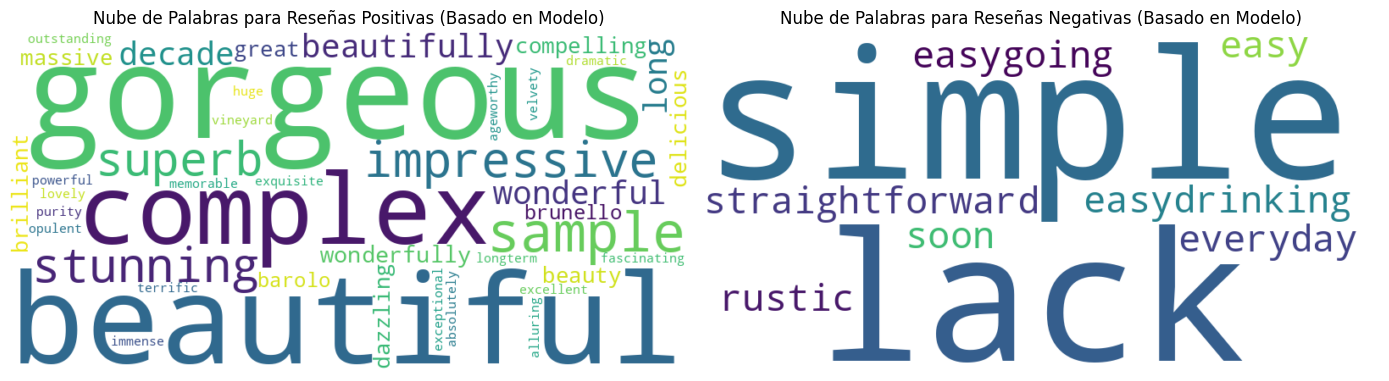

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Obtener los coeficientes del modelo de regresión logística
coefficients = model.coef_.flatten()

# Obtener las palabras del vocabulario
vocab = vectorizer.get_feature_names_out()

# Crear un diccionario con las palabras y sus respectivos coeficientes
word_coefficients = dict(zip(vocab, coefficients))

# Ordenar las palabras según el valor absoluto de los coeficientes (más importantes)
sorted_word_coefficients = sorted(word_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Seleccionar las top 50 palabras con los coeficientes más altos (positivos y negativos)
top_words = sorted_word_coefficients[:50]

# Dividir las palabras en positivas y negativas basadas en los coeficientes
positive_words = [word for word, coef in top_words if coef > 0]
negative_words = [word for word, coef in top_words if coef < 0]

# Crear las nubes de palabras
positive_text = ' '.join(positive_words)
negative_text = ' '.join(negative_words)

wordcloud_positive = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(negative_text)

# Mostrar las nubes de palabras
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Mostrar la nube de palabras para reseñas positivas
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Nube de Palabras para Reseñas Positivas (Basado en Modelo)')

# Mostrar la nube de palabras para reseñas negativas
axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Nube de Palabras para Reseñas Negativas (Basado en Modelo)')

plt.tight_layout()
plt.show()


Coeficientes del modelo: Usamos los coeficientes del modelo de regresión logística (model.coef_) que indican la relación entre las palabras y las clases (positiva o negativa). Un coeficiente alto (positivo) indica que la palabra está asociada con reseñas positivas, y un coeficiente negativo indica lo contrario.

Top palabras: Seleccionamos las 50 palabras más relevantes según su coeficiente (positivo o negativo). Estas son las que el modelo considera más importantes para predecir la clasificación.

Nubes de palabras: Generamos nubes de palabras usando las palabras positivas (coeficientes positivos) y palabras negativas (coeficientes negativos).

muestra cómo el modelo "ve" las palabras más relevantes para las clases positivas y negativas.

Conslusiones:
* Preprocesamiento y Lematización: Mejoraron la calidad de los datos y facilitaron el análisis posterior.
*La tokenización permitió descomponer las reseñas en unidades más pequeñas de significado, que luego fueron limpiadas de palabras comunes sin valor informativo (stopwords).
* se utilizó la lematización para reducir las palabras a su forma base, lo que ayuda a disminuir la variabilidad innecesaria y mejorar la precisión del modelo.
* Se observó que en las reseñas bien puntuadas, palabras como "tanino", "negro", y "cherry" se mencionan con frecuencia, mientras que en las mal puntuadas, las palabras más comunes incluyen "aroma", "final" y "paladar". Esto puede indicar que los catadores asocian ciertas características, como el "tanino" y las "notas de frutas rojas", con vinos de alta calidad.
* Modelo de análisis de sentimiento (Regresión Logística):reseñas fueron etiquetadas como positivas (puntuación > 90) o negativas (puntuación <= 90).
* Modelos de Clasificación:

* Regresión Logística fue el modelo con el mejor rendimiento general. Aunque su precisión para reseñas positivas fue algo baja, es un modelo robusto para la clasificación binaria.

* Redes Neuronales también mostró buenos resultados, con una mejor capacidad para predecir reseñas positivas, pero con menor precisión global que la regresión logística.

* KNN no superó a los otros modelos en precisión, lo que sugiere que el análisis de vecinos más cercanos no es tan efectivo para este tipo de clasificación.

* Análisis de Sentimiento: Se logró clasificar las reseñas de vino en positivas y negativas basándonos en sus puntuaciones, lo que proporciona una forma eficaz de categorizar las reseñas para análisis posteriores.

* La nube de palabras generada por los coeficientes del modelo mostró qué palabras eran más relevantes para las reseñas positivas y negativas. Las palabras asociadas con reseñas positivas son las que el modelo considera indicativas de calidad, como "tanino" y "cherry", mientras que las negativas incluyen términos como "acidez", "amargo" y "desbalance".
* El modelo tiene una ligera preferencia por las reseñas negativas, lo que podría ser un indicio de que el dataset tiene un mayor número de reseñas con puntuaciones bajas. Esto podría influir en el rendimiento del modelo en las reseñas positivas.

recomendaciones

Aumento de Datos: Si el modelo tiene un sesgo hacia las reseñas negativas, podría ser útil equilibrar las clases para mejorar el desempeño en reseñas positivas.

Ajustar los parámetros de los modelos, especialmente el número de características en la vectorización y los hiperparámetros de la regresión logística y las redes neuronales, podría mejorar aún más los resultados.